In [1]:
# Importing correct packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Machine Learning Libraries
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Figures
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
# No null values
df = pd.read_csv("/Users/matthewbuttlerives/Desktop/Data Folder/Period_1_Game_Stats_Final_ModelReady.csv")
df = df[:-9611]
df.drop(df.index[18800:40871],0,inplace=True)
df = df.reset_index(drop=True)
df.isna().sum()

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_72453/1532244197.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[18800:40871],0,inplace=True)


won                      0
Shots                    0
Shots_Against            0
Goals                    0
Goals_Against            0
Takeaways                0
Takeaways_Against        0
Hits                     0
Hits_Against             0
Blocked Shots            0
Blocked Shots Against    0
Giveaways                0
Giveaways_Against        0
Missed Shots             0
Missed Shots_Against     0
Penalities               0
Penalities_Against       0
#Won Faceoffs            0
#Lost Faceoffs           0
HoA_away                 0
HoA_home                 0
dtype: int64

In [3]:
df.head(5)

,won,Shots,Shots_Against,Goals,Goals_Against,Takeaways,Takeaways_Against,Hits,Hits_Against,Blocked Shots,Blocked Shots Against,Giveaways,Giveaways_Against,Missed Shots,Missed Shots_Against,Penalities,Penalities_Against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,0,8.0,8.0,0.0,3.0,1.0,3.0,14.0,5.0,3.0,3.0,6.0,7.0,4.0,0.0,1.0,1.0,10.0,12.0,1,0
1,1,8.0,8.0,3.0,0.0,3.0,1.0,5.0,14.0,3.0,3.0,7.0,6.0,0.0,4.0,1.0,1.0,12.0,10.0,0,1
2,1,11.0,12.0,0.0,1.0,0.0,2.0,4.0,4.0,6.0,8.0,2.0,0.0,6.0,3.0,1.0,3.0,11.0,9.0,1,0
3,0,12.0,11.0,1.0,0.0,2.0,0.0,4.0,4.0,8.0,6.0,0.0,2.0,3.0,6.0,3.0,1.0,9.0,11.0,0,1
4,1,9.0,8.0,0.0,1.0,3.0,2.0,4.0,5.0,7.0,1.0,7.0,5.0,3.0,8.0,2.0,1.0,7.0,11.0,1,0


In [4]:
# split data into X and y
y = df.pop('won')
X = df
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [5]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.588145	valid_0's binary_logloss: 0.602557
[40]	training's binary_logloss: 0.564346	valid_0's binary_logloss: 0.599359
[60]	training's binary_logloss: 0.546199	valid_0's binary_logloss: 0.600596
[80]	training's binary_logloss: 0.529762	valid_0's binary_logloss: 0.60314
[100]	training's binary_logloss: 0.514817	valid_0's binary_logloss: 0.604746


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [6]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.7570
Testing accuracy 0.6538


In [7]:
# Interestingly, slightly better accuracy
# make predictions for test data
from sklearn.metrics import precision_score, recall_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', (precision_score(y_test, predictions)))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy: 65.38%
Precision score:  0.6565500154846702
Recall score:  0.6459475929311396


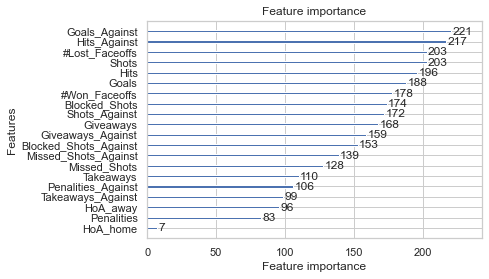

In [8]:
# plot feature importance
import lightgbm
from matplotlib import pyplot
lightgbm.plot_importance(model)
pyplot.show()

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

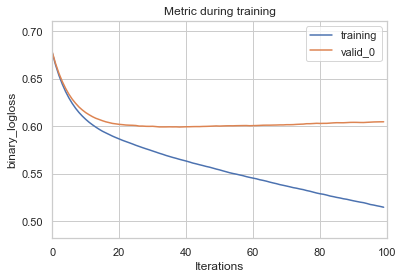

In [9]:
lgb.plot_metric(model)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


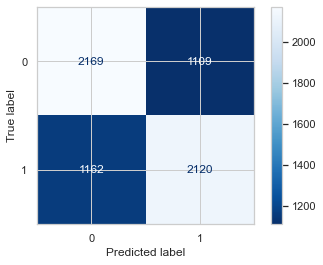

In [10]:
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [11]:
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66      3278
           1       0.66      0.65      0.65      3282

    accuracy                           0.65      6560
   macro avg       0.65      0.65      0.65      6560
weighted avg       0.65      0.65      0.65      6560



In [12]:
df.head(1)

,Shots,Shots_Against,Goals,Goals_Against,Takeaways,Takeaways_Against,Hits,Hits_Against,Blocked Shots,Blocked Shots Against,Giveaways,Giveaways_Against,Missed Shots,Missed Shots_Against,Penalities,Penalities_Against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,8.0,8.0,0.0,3.0,1.0,3.0,14.0,5.0,3.0,3.0,6.0,7.0,4.0,0.0,1.0,1.0,10.0,12.0,1,0


In [13]:
# make predictions for tonight data
def tonight_bet(shots,shots_against,goals,goals_against,takeaways,takeaways_against,hits,hits_against,blockedShots,blockedShots_against,giveaways,giveaways_against,missedShots,missedShots_against,penalties,penalties_against,Won_Faceoffs,Lost_Faceoffs,hoa_away,hoa_home):
    bet_df = pd.DataFrame({"shots": [shots],"shots_against": [shots_against],"goals": [goals],"goals_against": [goals_against],"takeaways": [takeaways],"takeaways_against": [takeaways_against],"hits": [hits],"hits_against": [hits_against]
                       ,"blockedShots": [blockedShots],"blockedShots_against": [blockedShots_against],"giveaways": [giveaways],"giveaways_against": [giveaways_against],"missedShots": [missedShots],"missedShots_against": [missedShots_against]
                       ,"penalties": [penalties],"penalties_against": [penalties_against],"#Won Faceoffs": [Won_Faceoffs],"#Lost Faceoffs": [Lost_Faceoffs],"hoa_away": [hoa_away],"hoa_home": [hoa_home],},index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],)
    bet_df = bet_df.iloc[:1 , :]
    tonights_team = bet_df
    return tonights_team

In [14]:
tonight_bet(30,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0)

,shots,shots_against,goals,goals_against,takeaways,takeaways_against,hits,hits_against,blockedShots,blockedShots_against,giveaways,giveaways_against,missedShots,missedShots_against,penalties,penalties_against,#Won Faceoffs,#Lost Faceoffs,hoa_away,hoa_home
0,30,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [15]:
# make predictions for test data
X_Game_test = tonight_bet(30,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0)
# store value to use in model

Game_y_pred = model.predict(X_Game_test)
prediction = [round(value) for value in Game_y_pred]
print(prediction)
probability = model.predict_proba(X_Game_test)
print(probability)

[1]
[[0.44167824 0.55832176]]


# API SportsRadar Request

In [16]:
# API Packages
import requests
import json
from sportradar.api import API

api_key = "sa8b3wuwy549qwy6jw6srsgv"
print("API Key:",api_key)

API Key: sa8b3wuwy549qwy6jw6srsgv


## Today's Games

In [22]:
from datetime import date
import re
from datetime import datetime,timedelta

today = date.today()

# dd/mm/YY
Day = today.strftime("%d")
Month = today.strftime("%m")
Year = today.strftime("%Y")
today = date.today()
print("Today's date:", today)
# Get API info
response = requests.get(("https://api.sportradar.us/nhl/trial/v7/en/games/{Year}/{Month}/{Day}/schedule.json?api_key=sa8b3wuwy549qwy6jw6srsgv").format(Day=Day, Month = Month, Year = Year))

# Define function that translates API into text
def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)
    return ""

# Set response as json
x = response.json()
# Print API info
def getrs(obj):
    Todays_Schedule = []
    Todays_Schedule = pd.DataFrame([],columns = ["Game ID","Home Team","Away Team","Start Time"])
    q = len(obj["games"])
    for i in range(q):
            GID = obj["games"][i]["id"]
            H = obj['games'][i]['home']['name']
            A = obj['games'][i]['away']['name']
            PD = obj['games'][i]['scheduled']
            PD = re.search('T(.+?)Z',PD)
            if PD:
                found = PD.group(1)
            format = "%H:%M:%S"
            d = datetime.strptime(found,format) - timedelta(hours=4)
            d = d.strftime("%H:%M:%S")
            PD = d
            temp_df = [GID,H,A,PD]
            a_series = pd.Series(temp_df,index = Todays_Schedule.columns)
            Todays_Schedule = Todays_Schedule.append(a_series, ignore_index=True)
    return Todays_Schedule
data=getrs(x)
data.head(10)

Today's date: 2022-04-05


,Game ID,Home Team,Away Team,Start Time
0,0b873568-d04c-42be-a6ff-c048192f58a8,Philadelphia Flyers,Columbus Blue Jackets,19:00:00
1,3ffad869-b5ec-414b-b162-a29bb0a3ac16,Pittsburgh Penguins,Colorado Avalanche,19:00:00
2,6d3496c2-75cc-4324-b751-f9b0e84385e1,Buffalo Sabres,Carolina Hurricanes,19:00:00
3,7c8d5934-98de-4076-ac3b-c78a1cfcf77a,New Jersey Devils,New York Rangers,19:00:00
4,8cdbd93f-7df7-4ccb-be24-d560546ed352,Montreal Canadiens,Ottawa Senators,19:00:00
5,981309ce-e25f-4891-b3d4-d20cc1b72439,Florida Panthers,Toronto Maple Leafs,19:00:00
6,204717db-c437-45c0-8534-faed9504b13d,Detroit Red Wings,Boston Bruins,19:30:00
7,333a8718-43ac-4423-8681-e271f7687717,Nashville Predators,Minnesota Wild,20:00:00
8,32fdc2ad-a003-4b38-8ed7-7df5867bff99,Dallas Stars,New York Islanders,20:30:00
9,39eebe95-2074-4cba-8ff3-60193fe76200,San Jose Sharks,Edmonton Oilers,22:30:00


# Current Game Stats

In [24]:
def get_game_play_by_play(self, game_id):
        """Get the Play-by-Play data for an NHL Game"""
        path = "https://api.sportradar.us/nhl/trial/v7/en/games/{game_id}/pbp.json?api_key={your_api_key}".format(game_id=game_id,your_api_key = self)
        response = requests.get(path)
        x = response.json()
        text = json.dumps(x, sort_keys=True, indent=4)
        print(text)
        return ""

In [20]:
response = requests.get("https://api.sportradar.us/nhl/trial/v7/en/games/e0e9b4c3-2d01-458f-9094-331687b96cb3/pbp.json?api_key=sa8b3wuwy549qwy6jw6srsgv")

# Define function that translates API into text
def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)
    return ""

# Set response as json
x = response.json()
x

In [18]:
#j = len(x['periods'][0]['events'])
#for i in range(j):
#    t = x['periods'][0]['events'][i]['event_type']
#    if t == "goal":
#        print(t)
 #   else:
 #       pass

In [20]:
#def update_stats(obj):
 #   Home_Team = []
 #   Away_Team = []
  #  Home_Team = pd.DataFrame([],columns = ["shots","goals","takeaways","hits","BlockedShots","giveaway","misses","penalties","#Won Faceoffs","#Lost Faceoffs"])
    #Home_Team = pd.DataFrame([],columns = ["shots",'shots_against','goals','goals_against','takeaways','takeaways_against','hits','hits_against','blockedShots','blockedShots_against','giveaways','giveaways_against','missedShots','missedShots_against','penalties','penalties_against','#Won Faceoffs','#Lost Faceoffs'])
  #  Away_Team = pd.DataFrame([],columns = ["shots",'shots_against','goals','goals_against','takeaways','takeaways_against','hits','hits_against','blockedShots','blockedShots_against','giveaways','giveaways_against','missedShots','missedShots_against','penalties','penalties_against','#Won Faceoffs','#Lost Faceoffs'])
  #  ht = len(obj["home"]['players'])
  #  at = len(obj['away']['players'])   
  #  total_g = 0
  #  total_s = 0
  #  total_t = 0
  #  total_h = 0
  #  total_bs = 0
   # total_gi = 0
  #  total_m = 0
   # total_p = 0
   # total_fw = 0
  #  total_fl = 0
  #  I = None
  #  for i in range(ht):
    #        g = obj["home"]["players"][i]['statistics']['periods'][0]['total']['goals']
    #        s = obj["home"]["players"][i]['statistics']['periods'][0]['total']['shots']
    #        t = obj["home"]["players"][i]['statistics']['periods'][0]['total']['takeaways']
    #        h = obj["home"]["players"][i]['statistics']['periods'][0]['total']['hits']
     #       bs = obj["home"]["players"][i]['statistics']['periods'][0]['total']['blocked_shots']
     #       gi = obj["home"]["players"][i]['statistics']['periods'][0]['total']['giveaways']
      #      m = obj["home"]["players"][i]['statistics']['periods'][0]['total']['missed_shots']
    #        p = obj["home"]["players"][i]['statistics']['periods'][0]['total']['penalties']
     #       fw = obj["home"]["players"][i]['statistics']['periods'][0]['total']['faceoffs_won']
       #     fl = obj["home"]["players"][i]['statistics']['periods'][0]['total']['faceoffs_lost'] 
      #      if total_g < g and total_g + g != total_g:
      #          I = i
      #      else:
       #         pass
      #      if total_g == g and i != I:
      #          total_g = total_g + g
      #          I = i
      #      else:
      #          pass
      #      if total_s < s and total_s + s != total_s:
      #          total_s = total_s + 1
     #           I = i
     #       else:
      #          pass
      #      if total_s == s and i != I:
      #          total_s = total_s + 1
      #          I = i
      #      else:
      #          pass
      #      if total_t < t:
       #         total_t = total_t + (t - total_t)
       #     else:
        #        pass
     #       if total_h < h:
     #           total_h = total_h + (h - total_h)
     #       else:
    #            pass
    #        if total_bs < bs:
    #            total_bs = total_bs + (bs - total_bs)
    #        else:
   #             pass
   #         if total_gi < gi:
   #             total_gi = total_gi + (gi - total_gi)
   #         else:
   #             pass
    #        if total_m < m:
   #             total_m = total_m + (m - total_m)
    #        else:
    #            pass
   #         if total_p < p:
     #           total_p = total_p + (p - total_p)
    #        else:
    #            pass
    #        if total_fw < fw:
    #            total_fw = total_fw + (fw - total_fw)
    #        else:
    #            pass
   #         if total_fl < fl:
    #            total_fl = total_fl + (fl - total_fl)
 #           else:
 #               pass
 #   home_df = [total_s,total_g,total_t,total_h,total_bs,total_gi,total_m,total_p,total_fw,total_fl]
 #   h_series = pd.Series(home_df,index = Home_Team.columns)
 #   Home_Team = Home_Team.append(h_series, ignore_index=True)
 #   return Home_Team
#update_stats(x)

In [21]:
#for i in range(at):
    #        ga = obj["away"]["players"][i]['statistics']['periods'][0]['total']['goals']
    #        sa = obj["away"]["players"][i]['statistics']['periods'][0]['total']['shots']
    #        ta = obj["away"]["players"][i]['statistics']['periods'][0]['total']['takeaways']
    #        ha = obj["away"]["players"][i]['statistics']['periods'][0]['total']['hits']
   #         bsa = obj["away"]["players"][i]['statistics']['periods'][0]['total']['blocked_shots']
   #         gia = obj["away"]["players"][i]['statistics']['periods'][0]['total']['giveaways']
   #         ma = obj["away"]["players"][i]['statistics']['periods'][0]['total']['missed_shots']
   #         pa = obj["away"]["players"][i]['statistics']['periods'][0]['total']['penalties']
    #        fwa = obj["away"]["players"][i]['statistics']['periods'][0]['total']['faceoffs_won']
    #        fla = obj["away"]["players"][i]['statistics']['periods'][0]['total']['faceoffs_lost'] 
    #away_df = [sa,s,ga,g,ta,t,ha,h,bsa,bs,gia,gi,ma,m,pa,p,fwa,fla]
      #  a_series = pd.Series(away_df,index = Away_Team.columns)
         #   Away_Team = Away_Team.append(a_series, ignore_index=True)